In [1]:
from Wavelet_Fast import *

import numpy as np
import matplotlib
from scipy import  fft
from astropy.io import fits

Wavelet Scale Analysis of DDO 69 in V and B filters:

Commencing the wavelet scale analysis of DD069_V
|████████████████████████████████████████| 100/100 [100%] in 1:08.7 (1.46/s) 
Wavelet scale analysis of DD069_V has finished.
Commencing the wavelet scale analysis of DD069_B
|████████████████████████████████████████| 100/100 [100%] in 1:09.7 (1.43/s) 
Wavelet scale analysis of DD069_B has finished.
The normal correlation between the maps is:  0.983388755621609


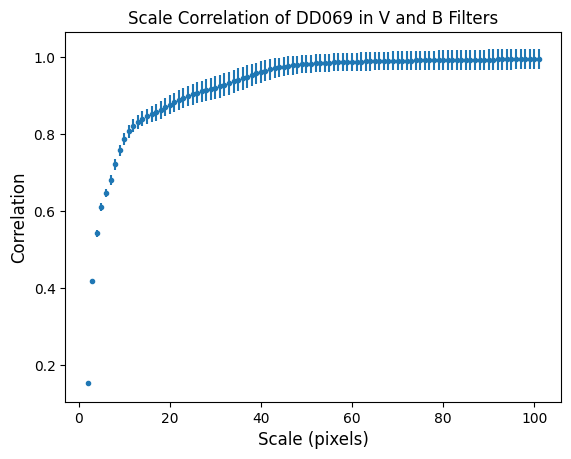

<Figure size 640x480 with 0 Axes>

In [2]:
scale_triplet = [2,100,1]

cube_V = pethat_wavelet_scale_analysis('DD069_V', 'starless_backgroundless_d69_V.fit', [[300,700],[200,600]], scales_in = scale_triplet, pixel_scale=1.134, distance=800000)
cube_B = pethat_wavelet_scale_analysis('DD069_B', 'starless_backgroundless_d69_B.fit', [[300,700],[200,600]],  scales_in = scale_triplet, pixel_scale=1.134, distance=800000)

plot_correlation(cube_V,cube_B,do_show=True)

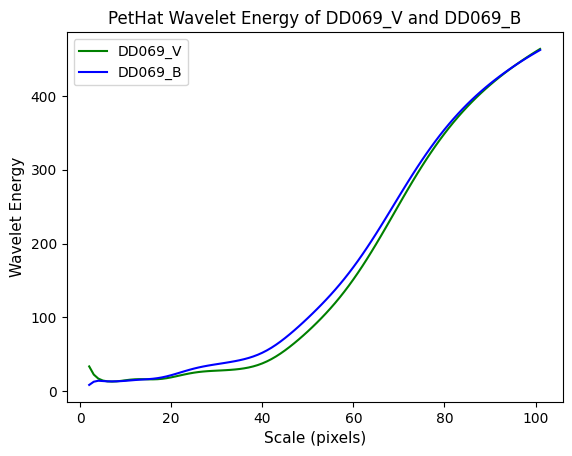

In [3]:
energy_V = cube_V.calc_energies(do_plot=False)
energy_B = cube_B.calc_energies(do_plot=False)

plt.plot(cube_V.scales,energy_V,label=cube_V.name,color='green')
plt.plot(cube_B.scales,energy_B,label=cube_B.name,color='blue')
plt.xlabel(r'Scale (pixels)', fontsize=11)
plt.ylabel(r'Wavelet Energy', fontsize=11)
plt.legend()
plt.title('PetHat Wavelet Energy of '+cube_V.name+' and '+cube_B.name, fontsize=12)
plt.savefig(path+'\\Output\\pethat_energy_'+cube_V.name+'_and_'+cube_B.name+'.png', dpi=300)
plt.show()



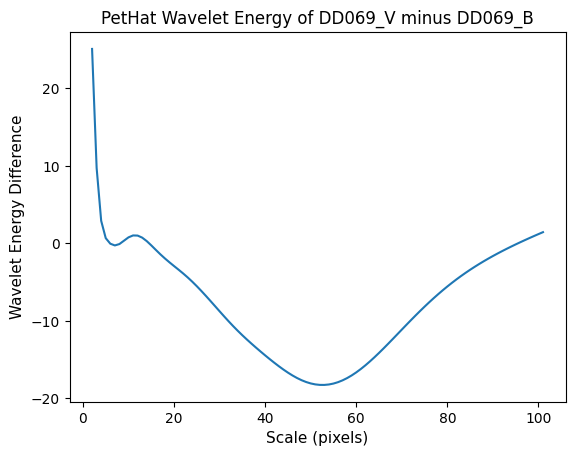

In [4]:
plt.plot(cube_V.scales,energy_V-energy_B)
plt.xlabel(r'Scale (pixels)', fontsize=11)
plt.ylabel(r'Wavelet Energy Difference', fontsize=11)
plt.title('PetHat Wavelet Energy of '+cube_V.name+' minus '+cube_B.name, fontsize=12)
plt.savefig(path+'\\Output\\pethat_energy_'+cube_V.name+'_minus_'+cube_B.name+'.png', dpi=300)
plt.show()